In [3]:
# Libreries for data analytics 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Libreries for Machine Learning
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('gold_monthly_csv.csv')

In [5]:
df
#df.shape

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [6]:
print(f"Date Range of gold price available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date Range of gold price available from - 1950-01 to 2020-07


In [7]:
date = pd.date_range (start = '1/1/1950', end = '8/1/2020', freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [8]:
df["Month"]= date
df.drop("Date", axis = 1, inplace= True)
df = df.set_index("Month")
df.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [ ]:
df.drop("Month", axis = 1, inplace= True)

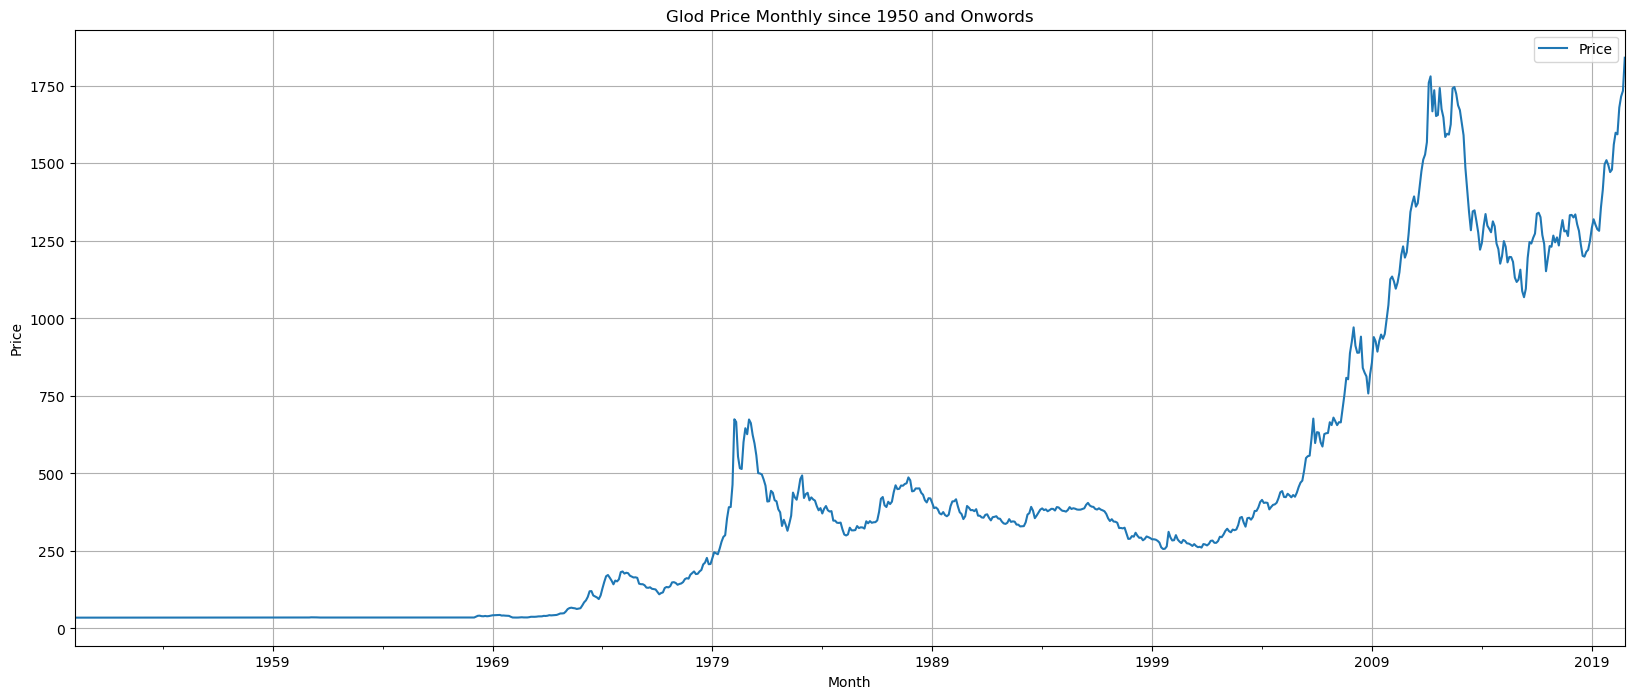

In [11]:
df.plot(figsize = (20, 8))
plt.title("Glod Price Monthly since 1950 and Onwords")
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid();

In [12]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


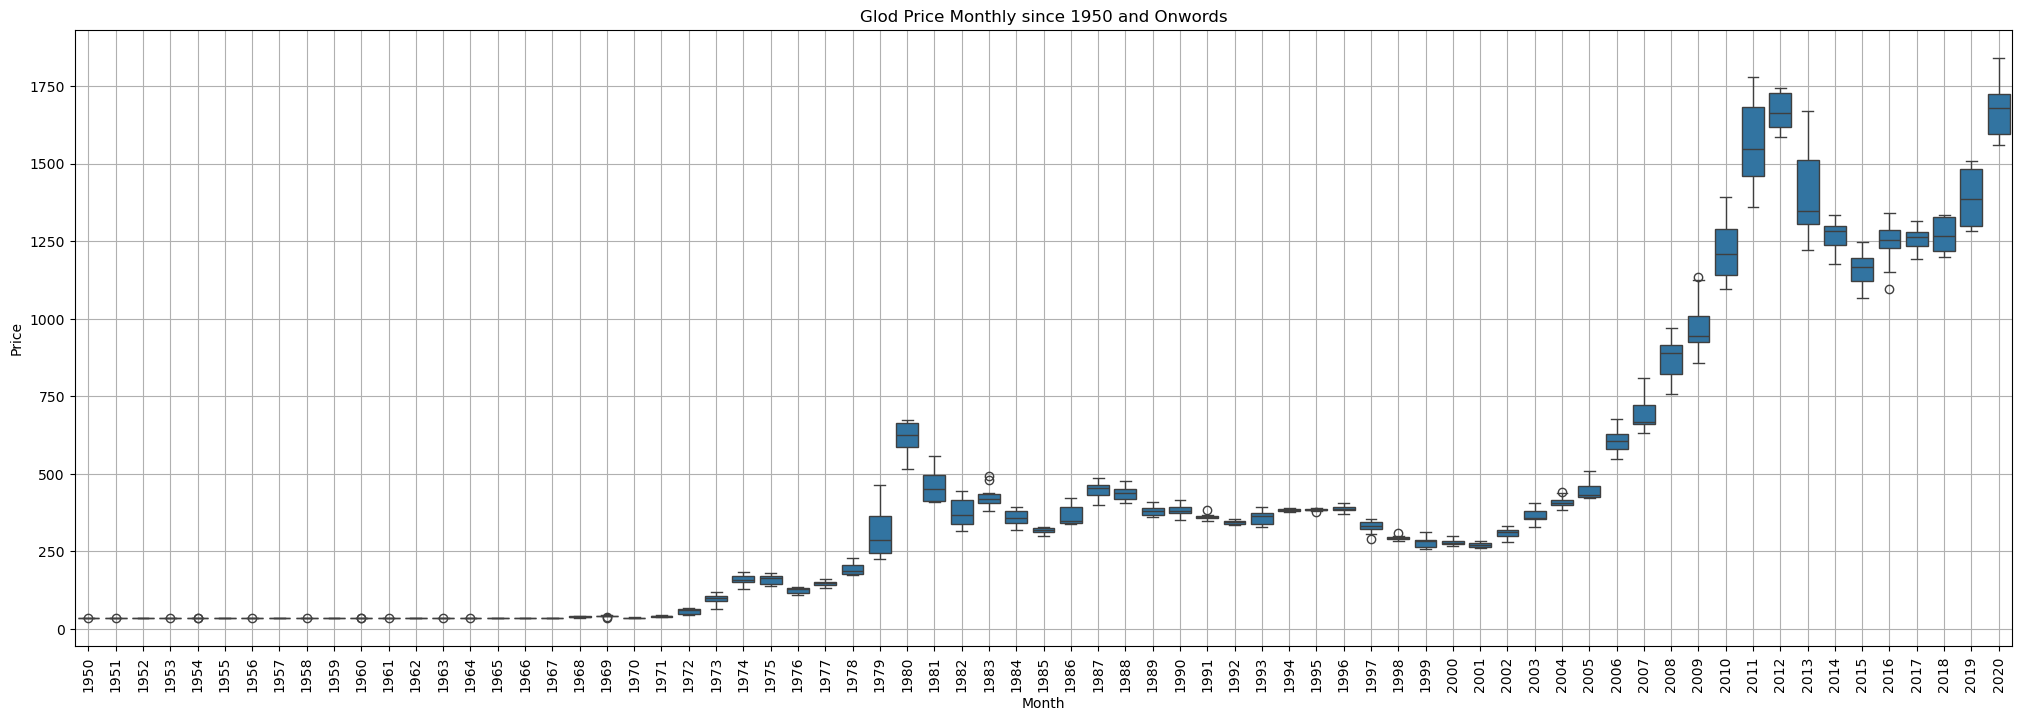

In [13]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0],ax=ax)
plt.title("Glod Price Monthly since 1950 and Onwords")
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.grid();

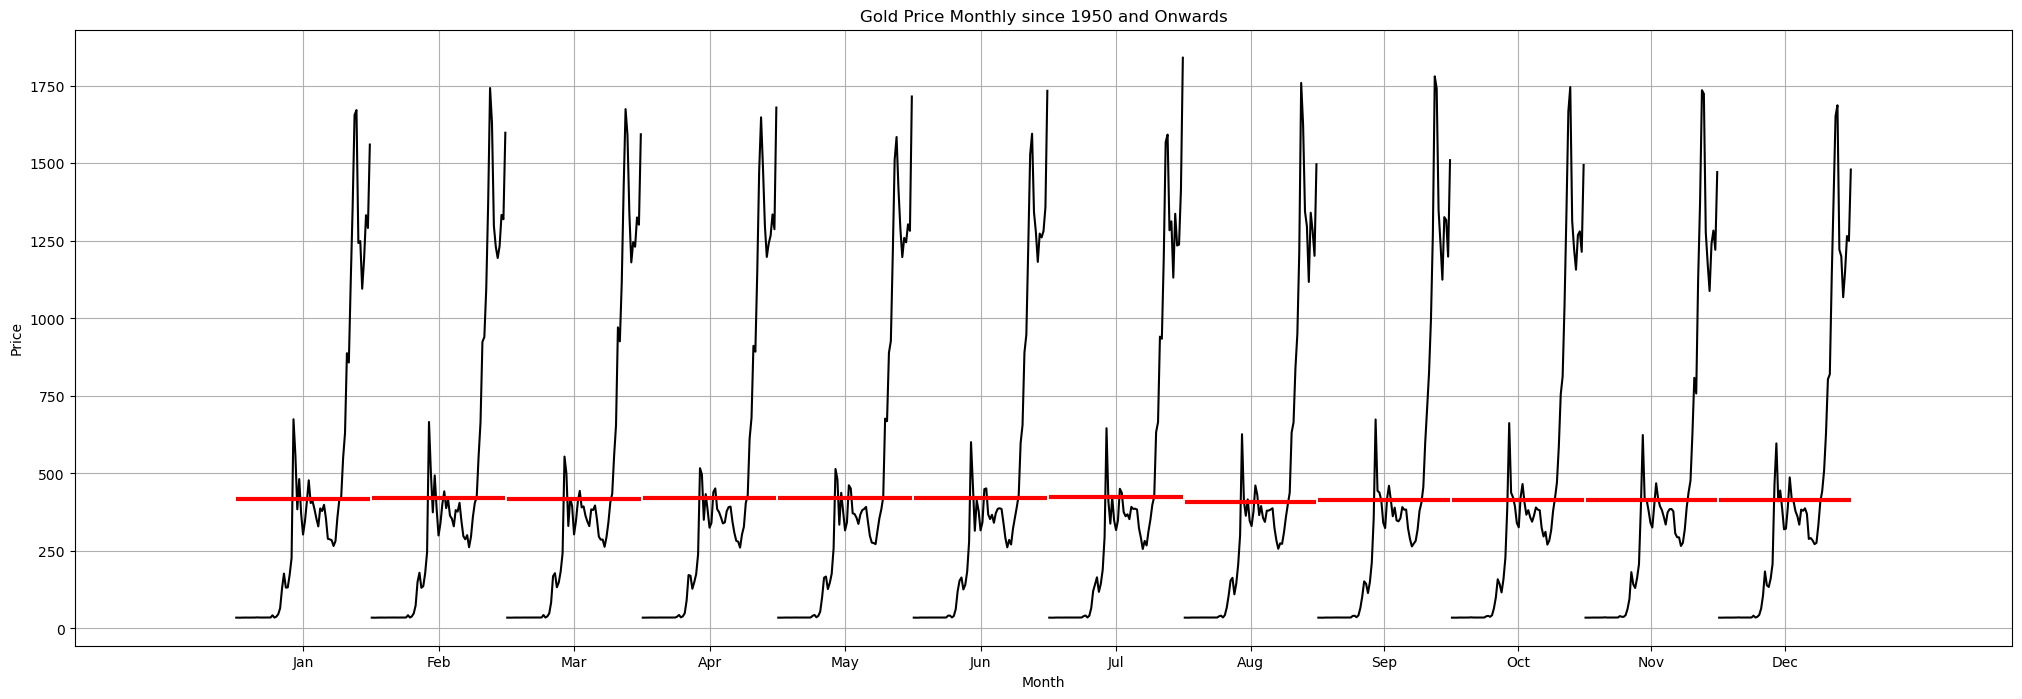

In [14]:
from statsmodels.graphics.tsaplots import month_plot

# Assuming your dataframe is named 'df' and it has columns 'Month' and 'Price'
fig, ax = plt.subplots(figsize=(25,8))

month_plot(df['Price'], ax=ax)
plt.title("Gold Price Monthly since 1950 and Onwards")
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()
plt.show()

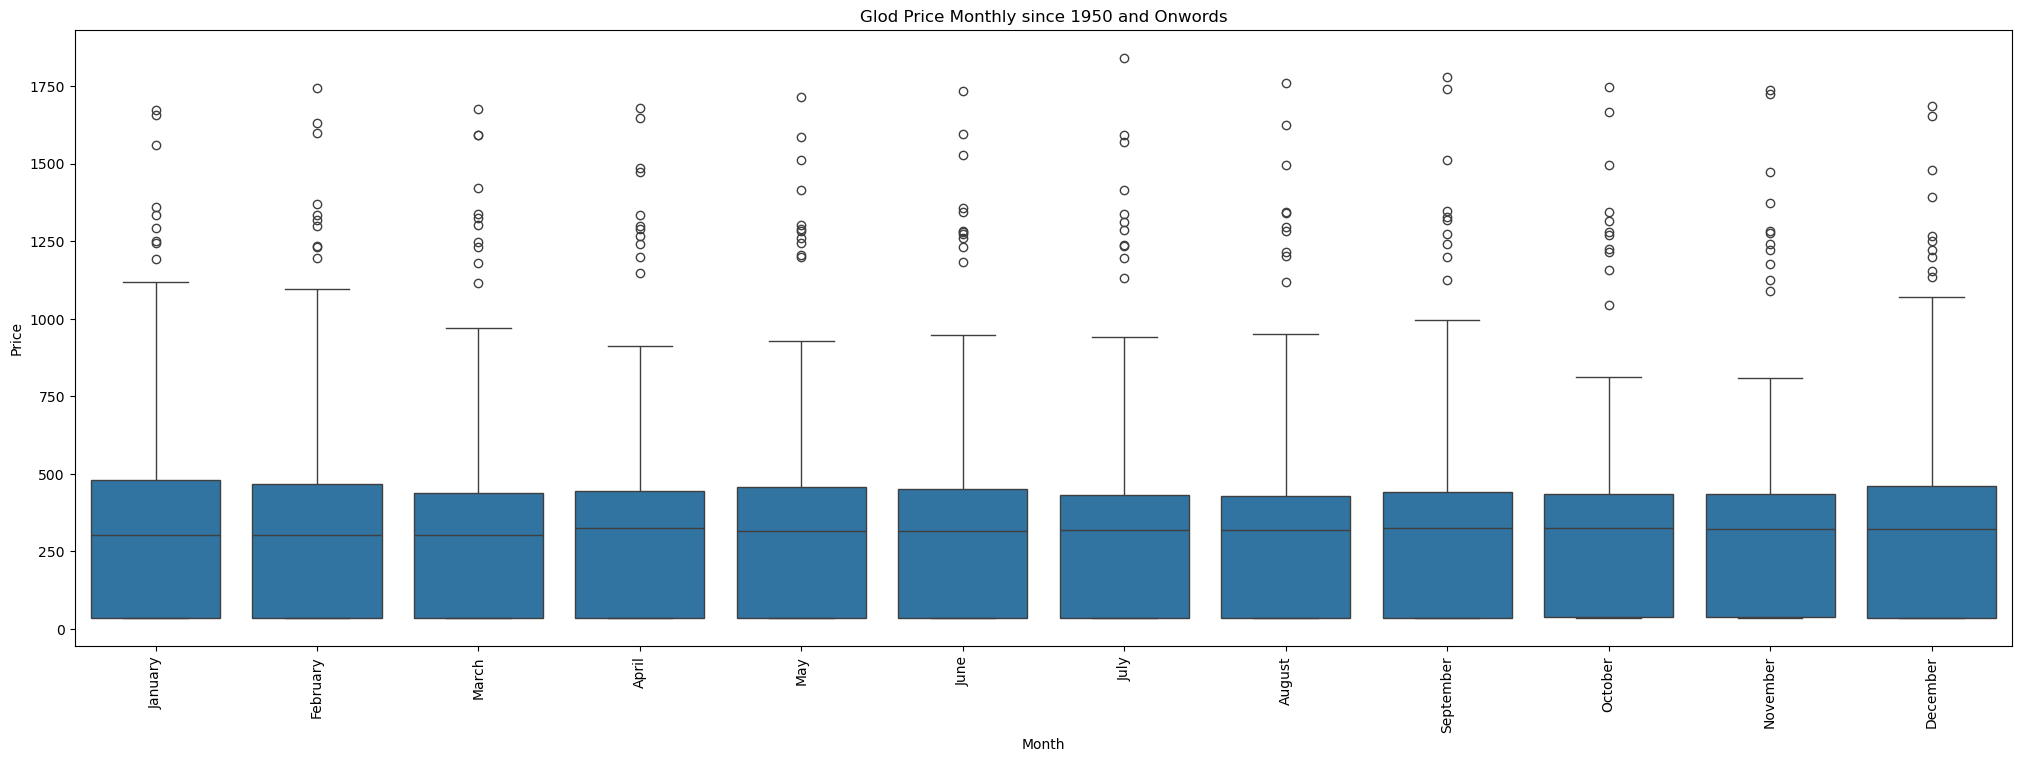

In [15]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0],ax=ax)
plt.title("Glod Price Monthly since 1950 and Onwords")
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show();

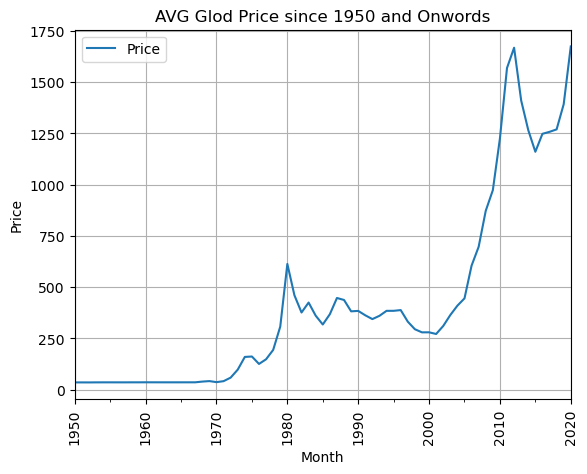

In [16]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("AVG Glod Price since 1950 and Onwords")
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.grid();

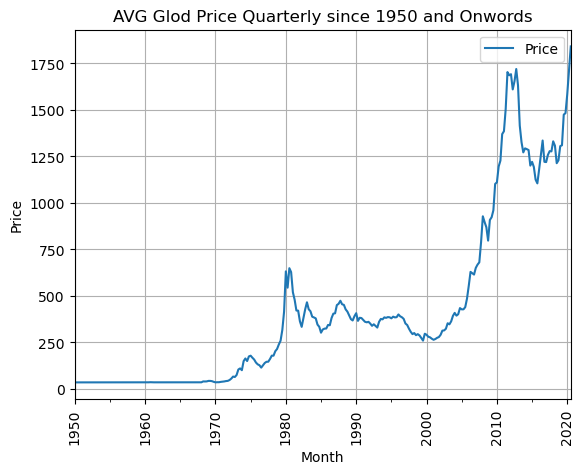

In [17]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title("AVG Glod Price Quarterly since 1950 and Onwords")
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.grid();

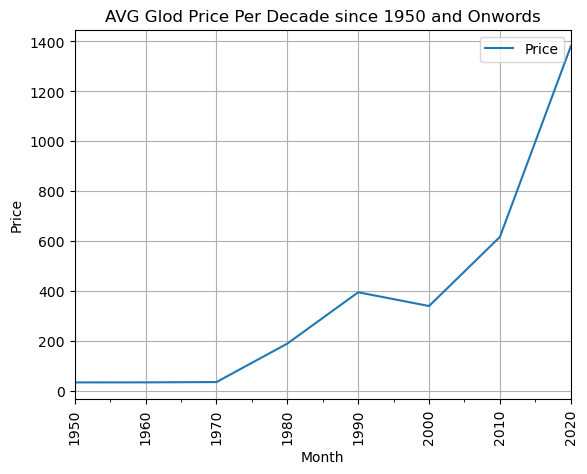

In [18]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title("AVG Glod Price Per Decade since 1950 and Onwords")
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.grid();

In [19]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {"Price":"Mean"})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {"Price": "Std"}),left_index = True, right_index = True)
df_1['Cov_pct']= ((df_1["Std"]/df_1["Mean"])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
Month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


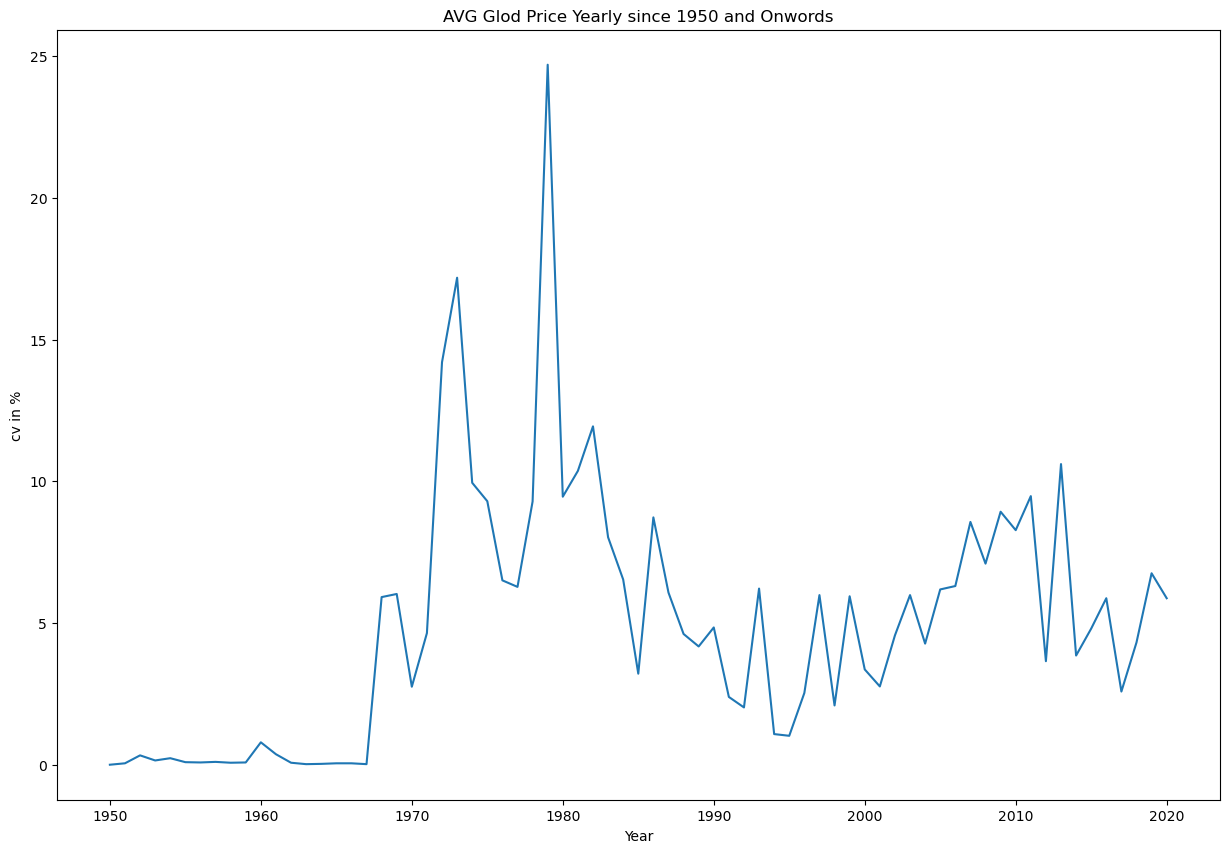

In [20]:
fig, ax = plt.subplots(figsize = (15,10))
df_1['Cov_pct'].plot();
plt.title("AVG Glod Price Yearly since 1950 and Onwords")
plt.xlabel('Year')
plt.ylabel('cv in %')
plt.show();


In [21]:
# Making Liner Regression model for forcasting of price of with the use of this data and machine learning
# Spliting Data into two parts as training data and testing data 
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [22]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


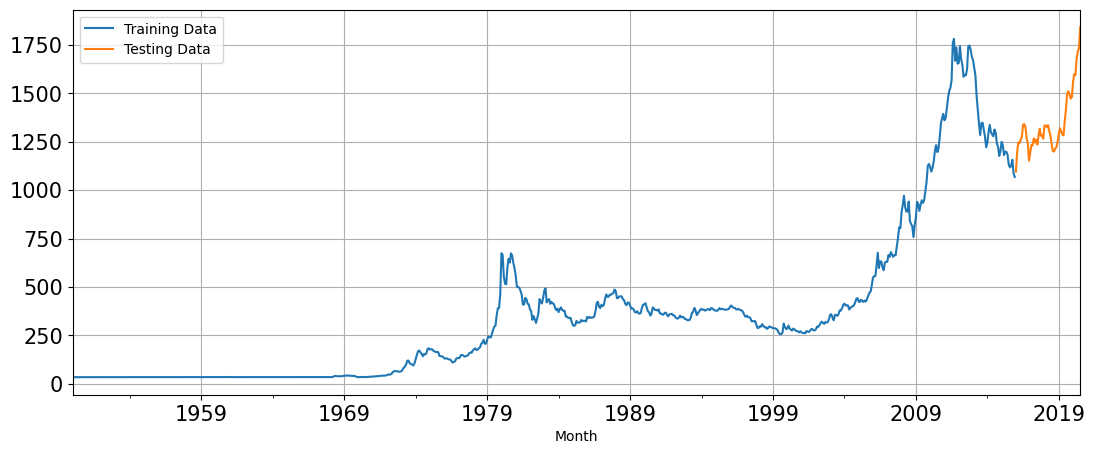

In [24]:
#ploting Traning and Testing data
train['Price'].plot(figsize = (13,5),fontsize = 15)
test['Price'].plot(figsize = (13,5),fontsize = 15)
plt.grid()
plt.legend(['Training Data','Testing Data'])
plt.show()

In [26]:
#Training data for forcasting
train_time = [i+1 for i in range (len(train))]
test_time = [i+len(train)+1 for i in range (len(test))]
len(train_time),len(test_time)

(792, 55)

In [35]:
LR_train = train.copy()
LR_test = test.copy()

In [36]:
LR_train['time']= train_time
LR_test['time']= test_time

In [37]:
LR= LinearRegression()
LR.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

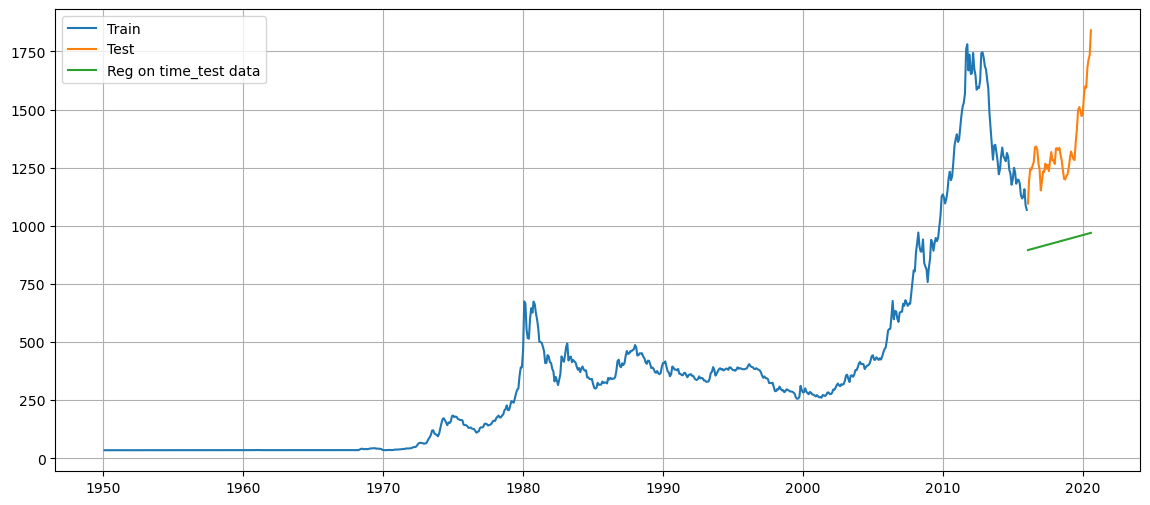

In [42]:
test_prediction_model1 = LR.predict(LR_test[['time']])
LR_test['Forecast'] = test_prediction_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'],label ='Train')
plt.plot(test['Price'],label ='Test')
plt.plot(LR_test['Forecast'],label ='Reg on time_test data')
plt.legend(loc = 'best')
plt.grid()

In [45]:
def mape(actual,pred):
    return round ((np.mean(abs(actual - pred)/actual))*100,2)

In [47]:
mape_model1_test= mape(test['Price'].values,test_prediction_model1)
print("MAPE is %3.3f"%(mape_model1_test),2)

MAPE is 29.760 2


In [48]:
results = pd.DataFrame({"Test mape (%)":[mape_model1_test]}, index =["RegressionOnTime"])
results

,Test mape (%)
RegressionOnTime,29.76


In [50]:
final_model = ExponentialSmoothing(df,
                                   trend ="Additive",
                                   seasonal = "Additive").fit(smoothing_level = 0.4,
                                                              smoothing_trend = 0.3,
                                                              smoothing_seasonal = 0.6)

In [53]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print('MAPE :', Mape_final_model)

MAPE : 17.24


In [58]:
predictions = final_model.forecast(steps=len(test))

In [59]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid,ddof = 1),
                       'prediction':predictions,
                        'upper_CI': predictions+ 1.96*np.std(final_model.resid,ddof = 1)
                       })

In [62]:
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


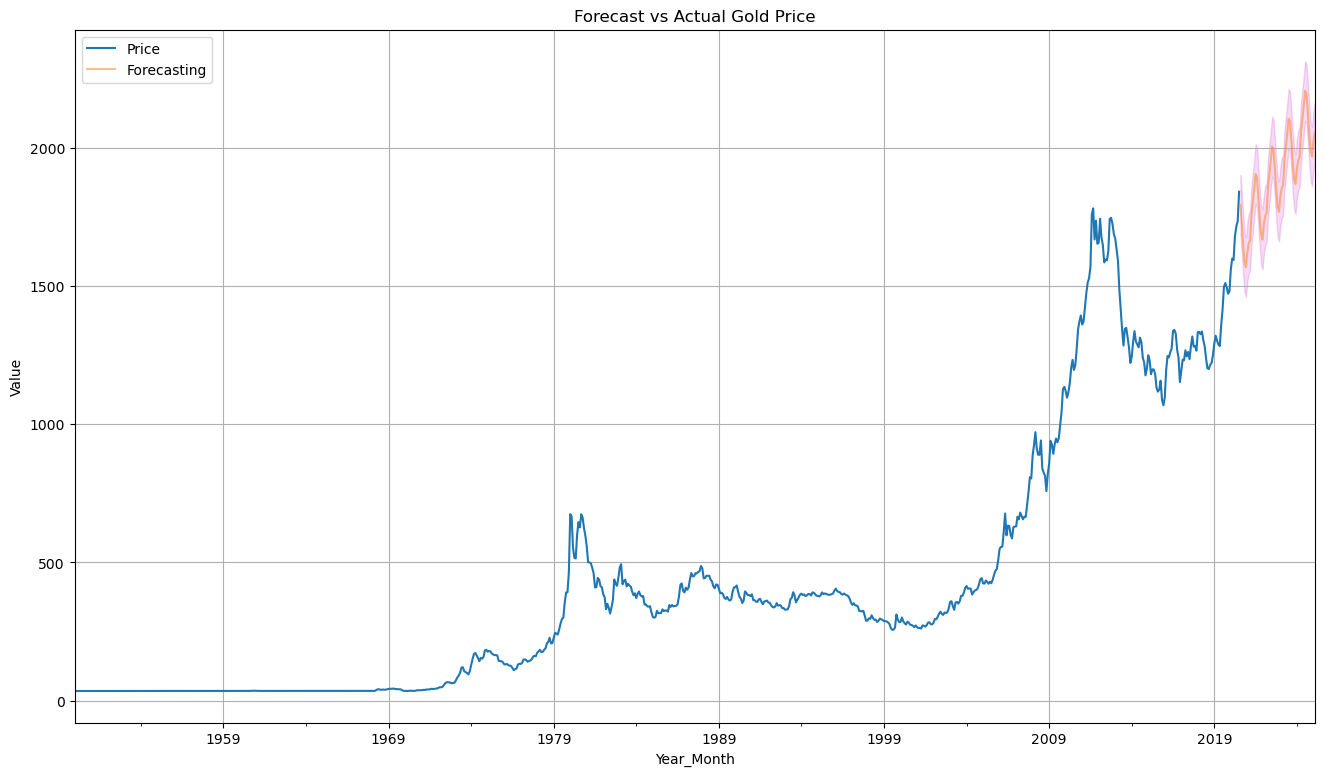

In [69]:
axis = df.plot(label="Actual", figsize=(16, 9))
pred_df['prediction'].plot(ax=axis, label='Forecasting', alpha=0.5)

# Fill the confidence interval area
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color="m", alpha=0.15)

# Correct label functions
axis.set_xlabel("Year_Month")
axis.set_ylabel("Value")
axis.set_title("Forecast vs Actual Gold Price")

plt.legend()
plt.grid(True)
plt.show()


In [72]:
import numpy as np
import pandas as pd

# 1️⃣ Get predictions
pred_df = pd.DataFrame()
pred_df['prediction'] = LR.predict(LR_test[['time']])

# 2️⃣ Calculate residuals and standard error
residuals = LR_train['Price'] - LR.predict(LR_train[['time']])
std_error = residuals.std()

# 3️⃣ Define 95% confidence intervals (approx ±1.96*std_error)
pred_df['lower_CI'] = pred_df['prediction'] - 1.96 * std_error
pred_df['upper_CI'] = pred_df['prediction'] + 1.96 * std_error

# 4️⃣ Combine with month and actual price
df_reset = df.reset_index() if 'Month' not in df.columns else df.copy()

final_df = pd.concat([
    df_reset[['Month', 'Price']].reset_index(drop=True),
    pred_df.reset_index(drop=True)
], axis=1)

# 5️⃣ Export
final_df.to_csv("GoldPrice_Forecast.csv", index=False)
print("✅ File exported successfully as 'GoldPrice_Forecast.csv'")
final_df.head()


✅ File exported successfully as 'GoldPrice_Forecast.csv'


,Month,Price,prediction,lower_CI,upper_CI
0,1950-01-31,34.73,895.511067,428.710498,1362.311637
1,1950-02-28,34.73,896.880902,430.080332,1363.681471
2,1950-03-31,34.73,898.250736,431.450166,1365.051305
3,1950-04-30,34.73,899.620570,432.820000,1366.421139
4,1950-05-31,34.73,900.990404,434.189835,1367.790973
